# Calculates the accuracy, precision, recall, and F1-score for a binary classification problem based on a confusion matrix. The code also displays the confusion matrix as a heatmap to make it more visual. 


# 2x2 Matrics

Explanation:
calculate_metrics function:

This function takes the true positives (TP), false negatives (FN), false positives (FP), and true negatives (TN) as inputs and calculates the accuracy, precision, recall, and F1-score for the binary classification.
Heatmap:

The confusion matrix is displayed as a heatmap using seaborn.heatmap(), with values annotated on the matrix for easy visualization.
Metrics Table:

The calculated metrics are displayed in a pandas DataFrame, making it easy to read and interpret the results.
Expected Output:
Running this code will output:

A heatmap of the confusion matrix with class labels for "Spam" and "Not Spam."
A table with the classification metrics, rounded to three decimal places, which will look like this:
Metric	Value
Accuracy	0.85
Precision	0.89
Recall	0.80
F1-Score	0.84
This approach provides both a visual representation of the confusion matrix and a summary of the model's performance metrics.








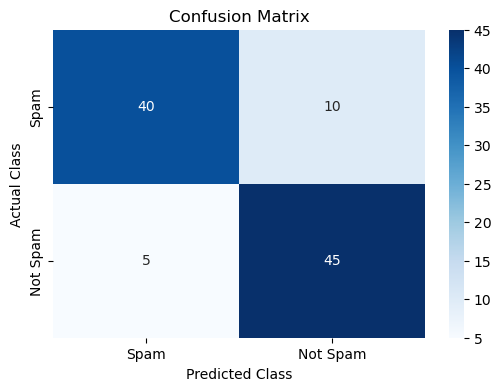

Classification Metrics:
      Metric  Value
0   Accuracy  0.850
1  Precision  0.889
2     Recall  0.800
3   F1-Score  0.842


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define confusion matrix values
confusion_matrix = np.array([
    [40, 10],  # Actual Spam
    [5, 45]    # Actual Not Spam
])

# Labels for the classes
labels = ["Spam", "Not Spam"]

# Function to calculate metrics for binary classification
def calculate_metrics(TP, FN, FP, TN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1_score

# Extract confusion matrix values
TP = confusion_matrix[0, 0]
FN = confusion_matrix[0, 1]
FP = confusion_matrix[1, 0]
TN = confusion_matrix[1, 1]

# Calculate metrics
accuracy, precision, recall, f1_score = calculate_metrics(TP, FN, FP, TN)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Value": [accuracy, precision, recall, f1_score]
})

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

# Display the metrics
print("Classification Metrics:")
print(metrics_df.round(3))


# 3x3 Matrics

Explanation:
calculate_metrics function:

This function iterates over each class and calculates the accuracy, precision, recall, and F1-score for each class.
It adds these metrics to a dictionary, which is later converted to a pandas DataFrame for better readability.
It also calculates the overall accuracy for the entire model.
Heatmap:

The confusion matrix is displayed as a heatmap using seaborn.heatmap(), which provides a visual representation of the number of true positives, false positives, etc., for each class.
Metrics Table:

The calculated metrics are displayed in a table format using pandas, with values rounded to three decimal places.
Expected Output:
The code will generate:

A heatmap of the confusion matrix.
A table with calculated metrics for each class (Dog, Cat, Rabbit) and overall accuracy, which will look like this:
Class	Accuracy	Precision	Recall	F1-Score
Dog	0.828	0.657	0.639	0.648
Cat	0.838	0.644	0.592	0.617
Rabbit	0.838	0.649	0.706	0.676
Overall	0.811	NaN	NaN	NaN

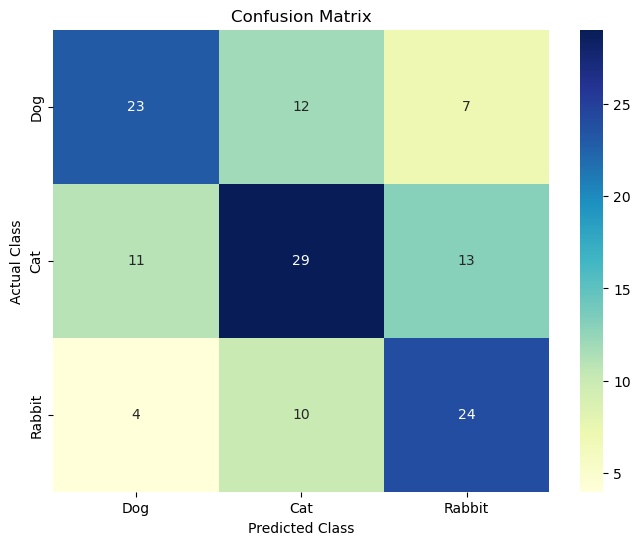

Classification Metrics:


,Class,Accuracy,Precision,Recall,F1-Score
0,Dog,0.744,0.605,0.548,0.575
1,Cat,0.654,0.569,0.547,0.558
2,Rabbit,0.744,0.545,0.632,0.585
3,Overall,0.571,NaN,NaN,NaN


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array([
    [23, 12, 7],   # Actual Dog
    [11, 29, 13],  # Actual Cat
    [4, 10, 24]    # Actual Rabbit
])

# Class labels
classes = ['Dog', 'Cat', 'Rabbit']

# Function to calculate metrics for each class
def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    metrics = {
        'Class': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }

    total_instances = np.sum(confusion_matrix)
    
    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP
        TN = total_instances - (TP + FP + FN)
        
        accuracy = (TP + TN) / total_instances
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics['Class'].append(classes[i])
        metrics['Accuracy'].append(accuracy)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1-Score'].append(f1_score)
    
    # Calculate overall accuracy
    overall_accuracy = np.trace(confusion_matrix) / total_instances
    metrics['Class'].append('Overall')
    metrics['Accuracy'].append(overall_accuracy)
    metrics['Precision'].append(np.nan)  # No precision for overall
    metrics['Recall'].append(np.nan)     # No recall for overall
    metrics['F1-Score'].append(np.nan)   # No F1-score for overall
    
    return pd.DataFrame(metrics)

# Calculate the metrics
metrics_df = calculate_metrics(confusion_matrix)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

# Display the metrics table
print("Classification Metrics:")
display(metrics_df.round(3))


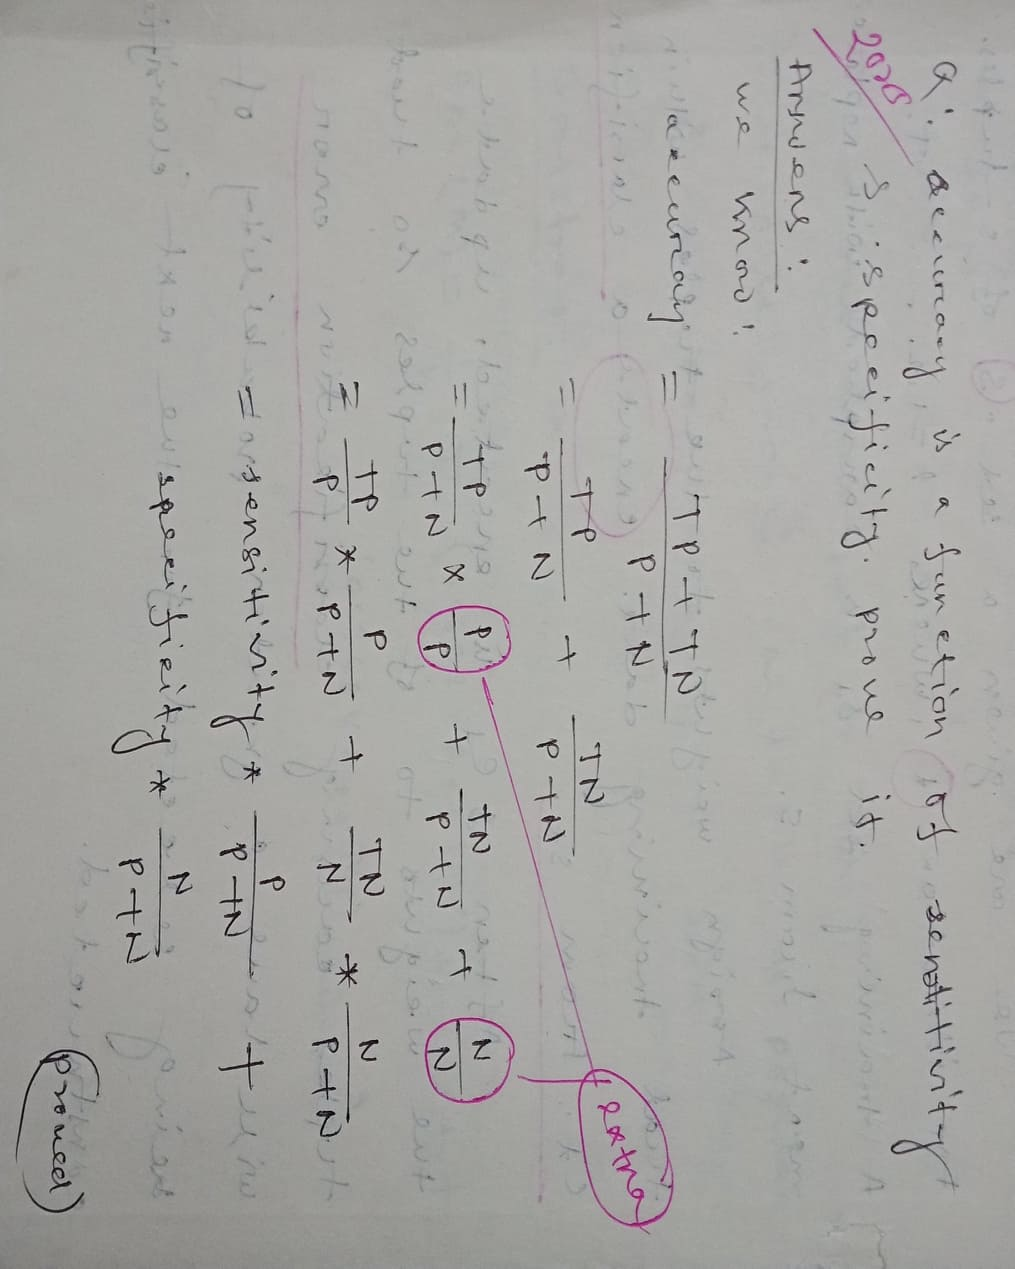

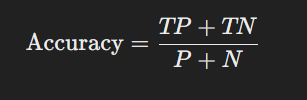

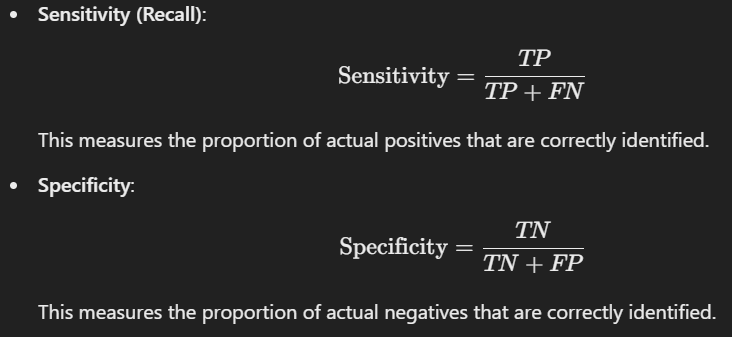

# Here's a complete guide on how to apply a classification alHere's a complete guide on how to apply a classification algorithm

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Load the Iris dataset from the specified path
file_path = r"C:\Users\Hp\Documents\CSE-4250\Lab 11 Confusion_Matrix\iris.csv"
iris = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hp\\Documents\\CSE-4250\\Lab 11 Confusion_Matrix\\iris.csv'

In [ ]:
iris

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(iris.head())

Dataset Preview:
   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(iris.isnull().sum())


Missing Values:
ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


In [ ]:
# Define features and target variable
X = iris.drop('Species', axis=1)  # Features
y = iris['Species']                 # Target

In [ ]:
# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
# Classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



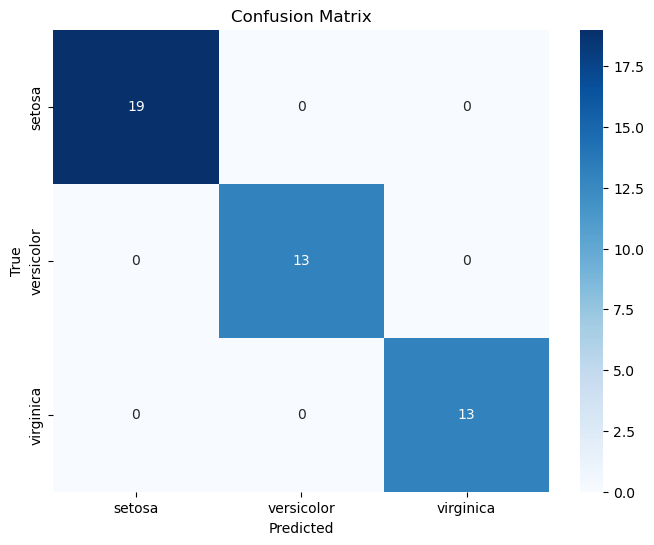

In [ ]:
# Data visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# The Complete Python code to apply Logistic Regression algorithms to the Iris dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Load the Iris dataset from the specified path
file_path = r"C:\Users\Hp\Documents\CSE-4250\Lab 11 Confusion_Matrix\iris.csv"
iris = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(iris.head())

Dataset Preview:
   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(iris.isnull().sum())


Missing Values:
ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


In [ ]:
# Define features and target variable
X = iris.drop('Species', axis=1)  # Features
y = iris['Species']                 # Target


In [ ]:
# Encode the target variable
y = pd.get_dummies(y, drop_first=True)  # Convert categorical to numerical

In [ ]:
# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardize the feature values for SVM, KNN, and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


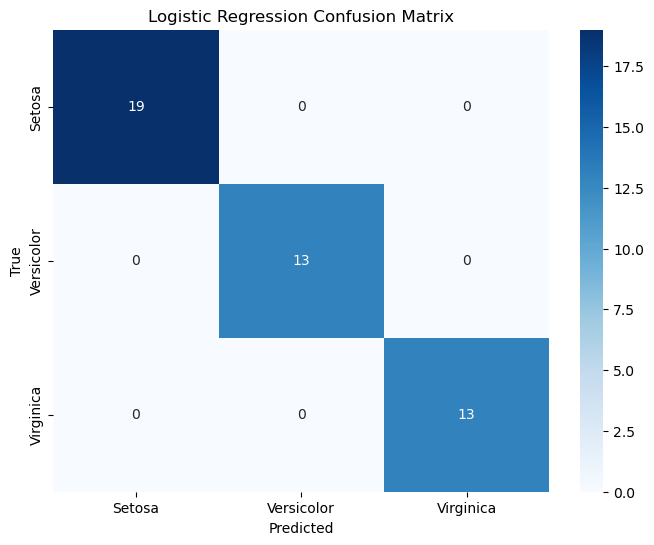

In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Compute the confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Setosa', 'Versicolor', 'Virginica'],
                 yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm_logistic, title='Logistic Regression Confusion Matrix')


# 1.	Suppose, for a binary classification actual class and the predicated class are 
## Actual Class = {1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0} and 
## Predicted Class = {1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0}. 

## Now, create a confusion matrix and calculates accuracy, misclassification rate, precision and specificity

Confusion Matrix:
[[5 2]
 [1 4]]

Performance Metrics:
Accuracy: 0.75
Misclassification Rate: 0.25
Precision: 0.67
Specificity: 0.71


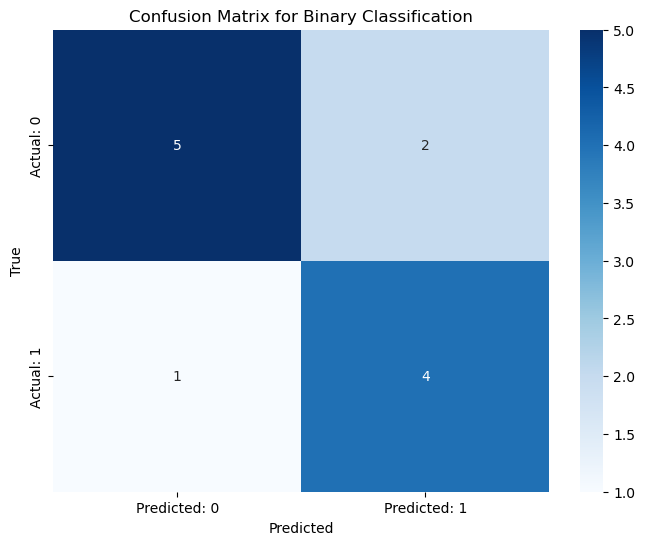

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Given Actual and Predicted Classes
   actual_class = np.array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])
predicted_class = np.array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

# Step 1: Create the Confusion Matrix
cm = confusion_matrix(actual_class, predicted_class)

# Step 2: Extract TP, TN, FP, FN
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Step 3: Calculate Performance Metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

# Step 4: Display the Results
print("Confusion Matrix:")
print(cm)
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Specificity: {specificity:.2f}")

# Step 5: Visualize the Confusion Matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Predicted: 0', 'Predicted: 1'],
                 yticklabels=['Actual: 0', 'Actual: 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, title='Confusion Matrix for Binary Classification')
